In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
test_df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
train_df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [6]:
train_df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

<Axes: >

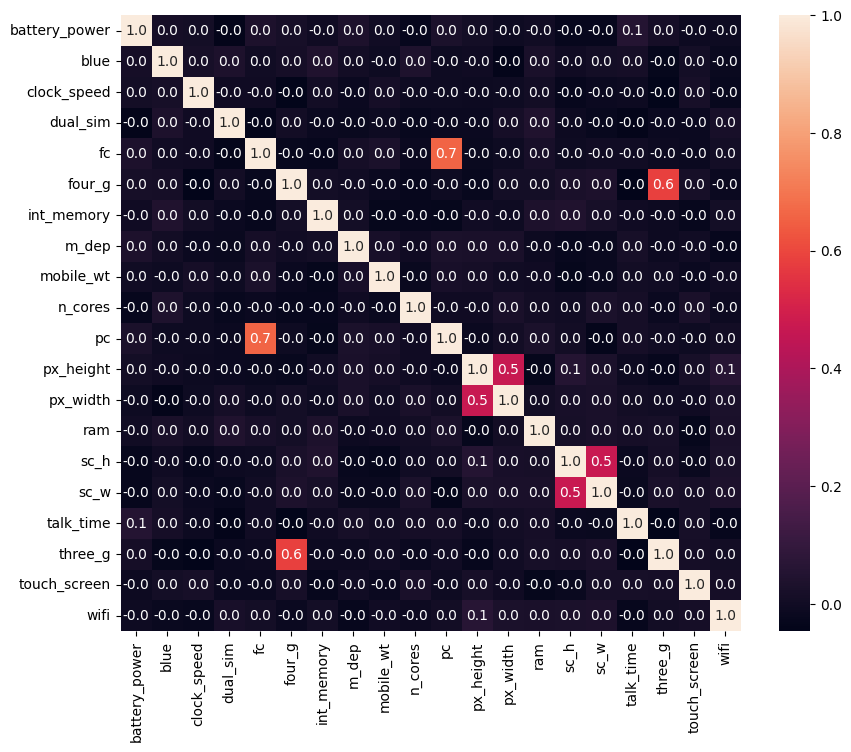

In [7]:
plt.figure(figsize = (10,8))

sns.heatmap(train_df.drop(columns = ['price_range']).corr(method = 'spearman'), annot = True, fmt = ".1f")

In [8]:
X = train_df.drop(columns = ['price_range'])
y = train_df['price_range']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, stratify = y)

In [10]:
X_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1992,674,1,2.9,1,1,0,21,0.2,198,3,4,576,1809,1180,6,3,4,1,1,1
369,1725,0,0.5,1,8,1,52,1.0,185,6,12,1125,1195,1243,19,18,5,1,1,1
1017,1221,0,0.5,0,1,1,28,0.5,139,1,7,1895,1976,2438,13,11,10,1,1,1
1229,1215,0,1.0,0,4,0,16,0.1,130,4,8,454,1473,2632,7,1,15,0,0,1
1844,504,1,1.0,0,8,0,14,0.5,189,7,9,881,1129,1607,15,0,10,1,1,1


In [12]:
cat_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [13]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations = 1000, learning_rate = 0.001, depth = 6, loss_function='MultiClass')

model.fit(X_train, y_train, eval_set = (X_val, y_val), verbose = False)

In [14]:
pred = model.predict(X_val)

In [18]:
from sklearn.metrics import classification_report

print(classification_report( y_val, pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       150
           1       0.74      0.72      0.73       150
           2       0.75      0.71      0.73       150
           3       0.86      0.92      0.89       150

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600

